In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

from keras import layers, optimizers, models
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

Using TensorFlow backend.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

# 資料集

In [2]:
np.random.seed(7)

train_data = pandas.read_csv("data/adult.data", encoding="UTF-8", header=None)
test_data = pandas.read_csv("data/adult.test", encoding="UTF-8", header=None, skiprows=1)


In [3]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


# 前置處理

In [5]:
# train_data = train_data[14].replace(' ', '').replace('.', '')
# test_data = test_data[14].replace(' ', '').replace('.', '')
train_data = train_data.replace(' ?', np.nan)
test_data = test_data.replace(' ?', np.nan)
train_data = train_data.dropna()
test_data = test_data.dropna()

In [6]:
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
def preprocessing(full_data):
    transform_needed = [False,
           True,
           False,
           True,
           False,
           True,
           True,
           True,
           True,
           True,
           False,
           False,
           False,
           True,
           True]


    def replaceSpaceAndDot(text: str):
        return text.replace(' ', '').replace('.', '')


    full_data[14] = full_data[14].apply(replaceSpaceAndDot)

    result = np.zeros(shape=(full_data.shape[0], full_data.shape[1]), dtype=np.float32)

    for i in range(len(transform_needed)):
        if transform_needed[i]:
            tmp_data = full_data.iloc[:, i].tolist()
            encoder = LabelEncoder()
            encoder.fit(tmp_data)
            result[:, i] = encoder.transform(tmp_data)
        else:
            result[:, i] = full_data.iloc[:, i].tolist()
            
    return result

In [8]:
trainingdata = preprocessing(train_data)
testingdata = preprocessing(test_data)

In [43]:
len(trainingdata)

30162

In [10]:
trainingdata[0]

array([3.9000e+01, 5.0000e+00, 7.7516e+04, 9.0000e+00, 1.3000e+01,
       4.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00,
       2.1740e+03, 0.0000e+00, 4.0000e+01, 3.8000e+01, 0.0000e+00],
      dtype=float32)

In [44]:
for val in trainingdata[0]:
    print(val)

39.0
5.0
77516.0
9.0
13.0
4.0
0.0
1.0
4.0
1.0
2174.0
0.0
40.0
38.0
0.0


In [11]:
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(trainingdata)
data_norm= pandas.DataFrame(np_scaled)
trainingdata = data_norm.to_numpy()
trainingdata

array([[0.30136985, 0.8333334 , 0.04333771, ..., 0.39795917, 0.95      ,
        0.        ],
       [0.4520548 , 0.6666667 , 0.04727738, ..., 0.12244897, 0.95      ,
        0.        ],
       [0.2876712 , 0.33333334, 0.13724391, ..., 0.39795917, 0.95      ,
        0.        ],
       ...,
       [0.56164384, 0.33333334, 0.09391367, ..., 0.39795917, 0.95      ,
        0.        ],
       [0.06849313, 0.33333334, 0.1276201 , ..., 0.19387755, 0.95      ,
        0.        ],
       [0.47945207, 0.5       , 0.18638337, ..., 0.39795917, 0.95      ,
        1.        ]], dtype=float32)

In [14]:
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(testingdata)
data_norm= pandas.DataFrame(np_scaled)
testingdata = data_norm.to_numpy()
testingdata

array([[0.10958904, 0.33333334, 0.14443012, ..., 0.39795917, 0.94871795,
        0.        ],
       [0.2876712 , 0.33333334, 0.05167688, ..., 0.5       , 0.94871795,
        0.        ],
       [0.15068492, 0.16666667, 0.21901093, ..., 0.39795917, 0.94871795,
        1.        ],
       ...,
       [0.2876712 , 0.33333334, 0.24476203, ..., 0.5       , 0.94871795,
        0.        ],
       [0.36986297, 0.33333334, 0.04766648, ..., 0.39795917, 0.94871795,
        0.        ],
       [0.24657533, 0.5       , 0.11419533, ..., 0.6020408 , 0.94871795,
        1.        ]], dtype=float32)

# 實驗設計

In [15]:
x_train = trainingdata[:, :13]
y_train = trainingdata[:, 14]

x_test = testingdata[:, :13]
y_test = testingdata[:, 14]

total_class = np.unique(trainingdata[:, 14]).shape[0]

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(x_train.shape[1],), activation="sigmoid"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=100, batch_size=128)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 20208 samples, validate on 9954 samples
Epoch 1/100
20208/20208 [==============================] - 2s 106us/step - loss: 0.5468 - acc: 0.7410 - val_loss: 0.4950 - val_acc: 0.7457
Epoch 2/100
20208/20208 [==============================] - 1s 29us/step - loss: 0.4672 - acc: 0.7764 - val_loss: 0.4529 - val_acc: 0.7749
Epoch 3/100
20208/20208 [==============================] - 1s 31us/step - loss: 0.4433 - acc: 0.7941 - val_loss: 0.4219 - val_acc: 0.8169
Epoch 4/100
20208/20208 [==============================] - 1s 31us/step - loss: 0.4268 - acc: 0.8063 - val_loss: 0.4116 - val_acc: 0.8197
Epoch 5/100
20208/20208 [==============================] - 1s 30us/step - loss: 0.4140 - acc: 0.8101 - val_loss: 0.3990 - val_acc: 0.8219
Epoch 6/100
20208/20208 [

# 實驗結果

15060/15060 [==============================] - 0s 26us/step
Test Acc : 0.842297476743797
Test Loss : 0.33149393729242194


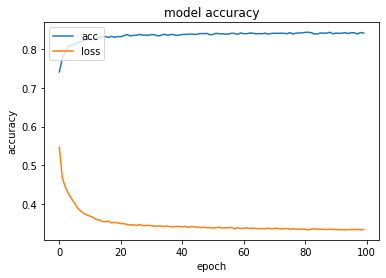

In [16]:

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Acc : " + str(accuracy))
print("Test Loss : " + str(loss))

plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()